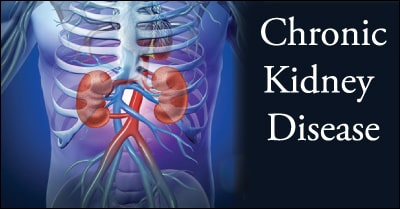

# Importing all Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import scipy.stats as stats
sns.set()

import warnings
warnings.filterwarnings('ignore')


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import StackingClassifier


from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

# Extracting Dataset

In [2]:
kidn_dis=pd.read_csv('kidney_disease.csv')
kidn_dis.head(10)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,0.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,...,33,9600,4,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


# Parameters of kidney Data set

In [3]:
kidn_dis.shape

(400, 26)

inisde information of dataset

In [4]:
kidn_dis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

# Finding null/ missing values

In [5]:
kidn_dis.isnull().sum()/len(kidn_dis)*100

id                 0.00
age                2.25
bp                 3.00
sg                11.75
al                11.50
su                12.25
rbc               38.00
pc                16.25
pcc                1.00
ba                 1.00
bgr               11.00
bu                 4.75
sc                 4.25
sod               21.75
pot               22.00
hemo              13.00
pcv               17.50
wc                26.25
rc                32.50
htn                0.50
dm                 0.50
cad                0.50
appet              0.25
pe                 0.25
ane                0.25
classification     0.00
dtype: float64

# Heatmap for all Features consists of Null values

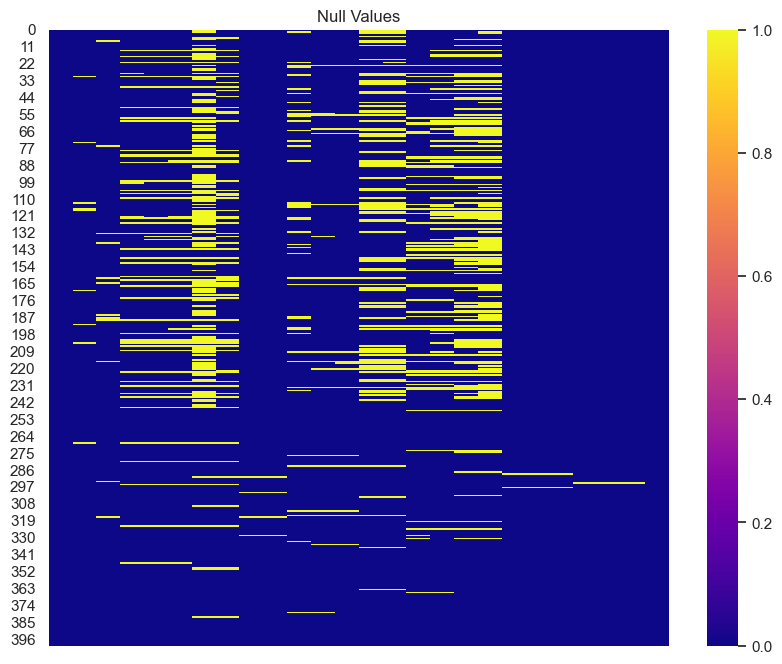

In [6]:
plt.figure(figsize=(10,8))
sns.heatmap(kidn_dis.isnull(), cmap='plasma',cbar=True ,xticklabels=False,)
plt.title("Null Values")

plt.show()

# Imputing Null Value

In [7]:
num_col =kidn_dis.select_dtypes(exclude=['object']).columns.tolist()
obj_col = kidn_dis.select_dtypes(include=['object']).columns.tolist()
print('numeric columns :', num_col)
print()
print('---'*20)
print()
print('object columns :',obj_col)

numeric columns : ['id', 'age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo']

------------------------------------------------------------

object columns : ['rbc', 'pc', 'pcc', 'ba', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']


In [8]:
for col in num_col :
     kidn_dis[col] = kidn_dis[col].fillna(kidn_dis[col].median())
for col in obj_col:
     kidn_dis[col] = kidn_dis[col].fillna(kidn_dis[col].mode()[0])


In [9]:
kidn_dis.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

# Checking the Unique Values in Columns

In [10]:
for i in kidn_dis.columns:
    print('========================',i,
          '=========================')
    print()
    print(set(kidn_dis[i].tolist()))
    print()

======================== id =========================

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210,

In [11]:
kidn_dis['classification'] = kidn_dis['classification'].apply(lambda x :'ckd' if x=='ckd\t' else x)

In [12]:
kidn_dis['cad'] = kidn_dis['cad'].apply(lambda x : 'no' if x=='\tno' else x)
kidn_dis['dm'] = kidn_dis['dm'].apply(lambda x : 'no' if x=='\tno' else x)
kidn_dis['dm'] =  kidn_dis['dm'].apply(lambda x : 'yes' if x=='\tyes' else x)
kidn_dis['dm'] =  kidn_dis['dm'].apply(lambda x : 'yes' if x==' yes' else x)
kidn_dis['rc'] =  kidn_dis['rc'].apply(lambda x : '5.2' if x=='\t?' else x)
kidn_dis['wc'] =  kidn_dis['wc'].apply(lambda x : '9800' if x=='\t?' else x)
kidn_dis['wc'] =  kidn_dis['wc'].apply(lambda x : '8400' if x=='\t8400' else x)
kidn_dis['wc'] =  kidn_dis['wc'].apply(lambda x : '6200' if x=='\t6200' else x)
kidn_dis['pcv'] =  kidn_dis['pcv'].apply(lambda x : '43' if x=='\t43' else x)
kidn_dis['pcv'] =  kidn_dis['pcv'].apply(lambda x : '41' if x=='\t?' else x)

In [13]:
for i in kidn_dis.columns:
    print('========================',i,
          '=========================')
    print()
    print(set(kidn_dis[i].tolist()))
    print()

======================== id =========================

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210,

# Checking UniqueValues for all features

In [60]:
kidn_dis.nunique()

id                400
age                76
bp                 11
sg                  5
al                  6
su                  6
rbc                 2
pc                  2
pcc                 2
ba                  2
bgr               146
bu                118
sc                 84
sod                34
pot                40
hemo              116
pcv                42
wc                 89
rc                 45
htn                 2
dm                  2
cad                 2
appet               2
pe                  2
ane                 2
classification      2
dtype: int64

In [61]:
kidn_dis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             400 non-null    float64
 2   bp              400 non-null    float64
 3   sg              400 non-null    float64
 4   al              400 non-null    float64
 5   su              400 non-null    float64
 6   rbc             400 non-null    object 
 7   pc              400 non-null    object 
 8   pcc             400 non-null    object 
 9   ba              400 non-null    object 
 10  bgr             400 non-null    float64
 11  bu              400 non-null    float64
 12  sc              400 non-null    float64
 13  sod             400 non-null    float64
 14  pot             400 non-null    float64
 15  hemo            400 non-null    float64
 16  pcv             400 non-null    object 
 17  wc              400 non-null    obj

In [62]:
features=(kidn_dis.select_dtypes(exclude=['object']).columns)[0:]
features

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot',
       'hemo'],
      dtype='object')

# Checking for outlier:

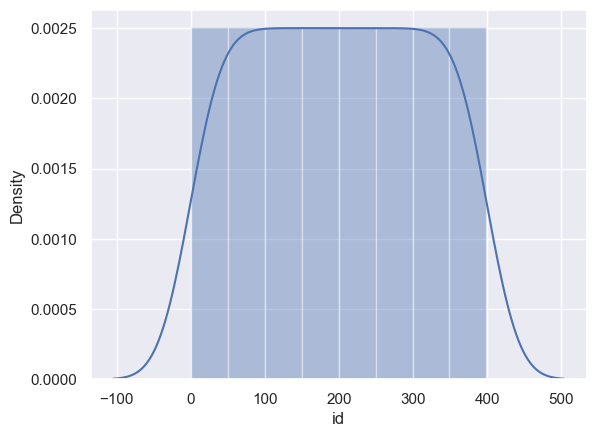

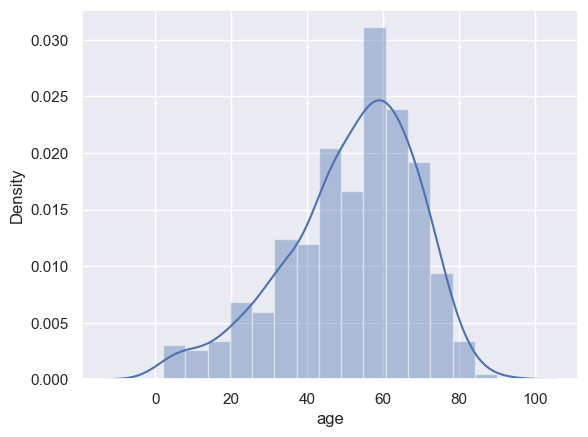

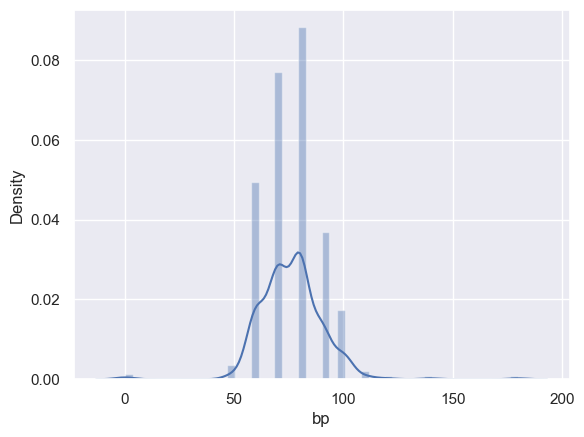

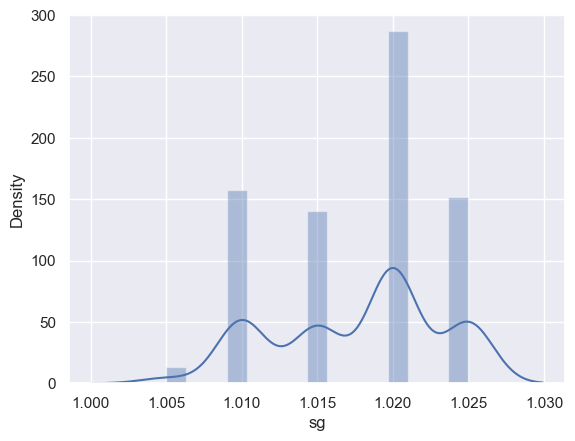

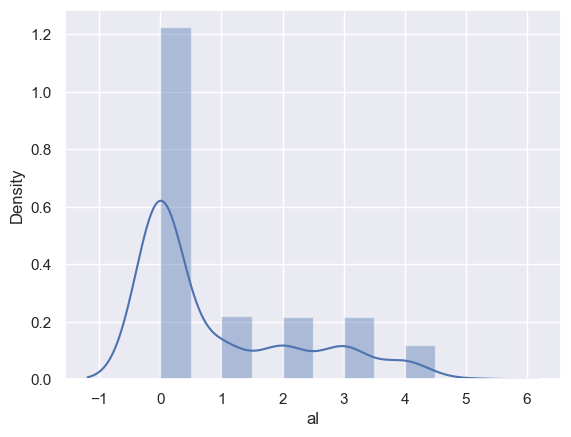

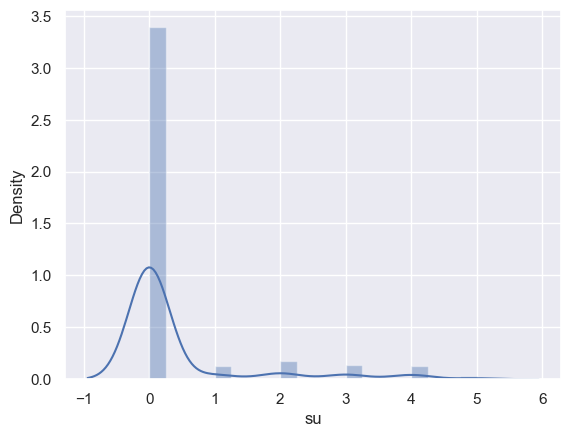

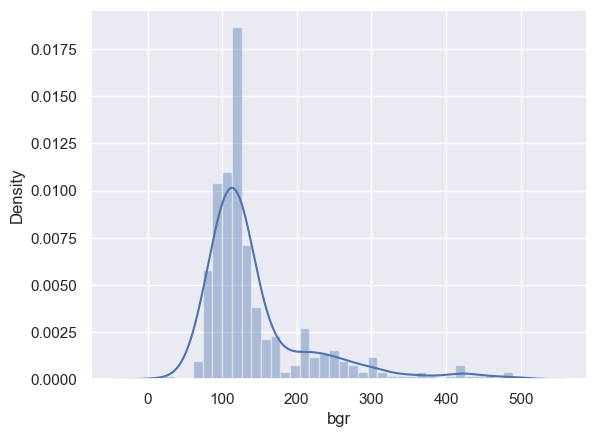

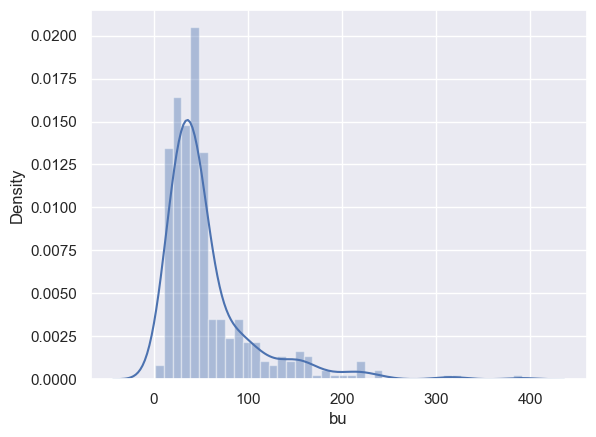

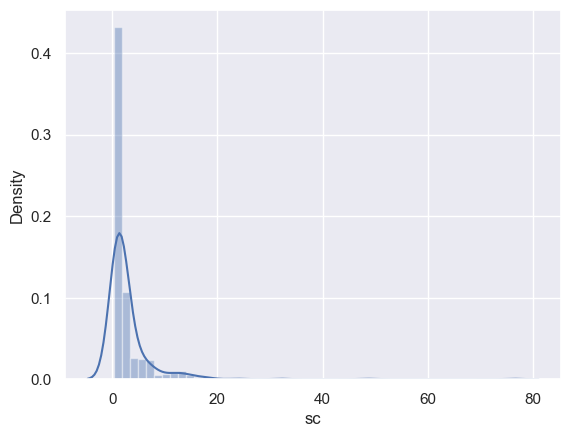

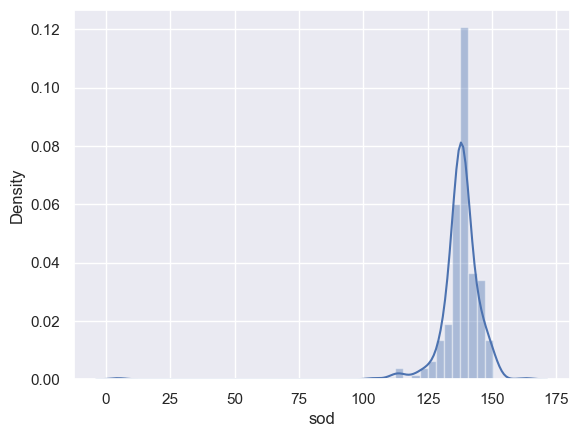

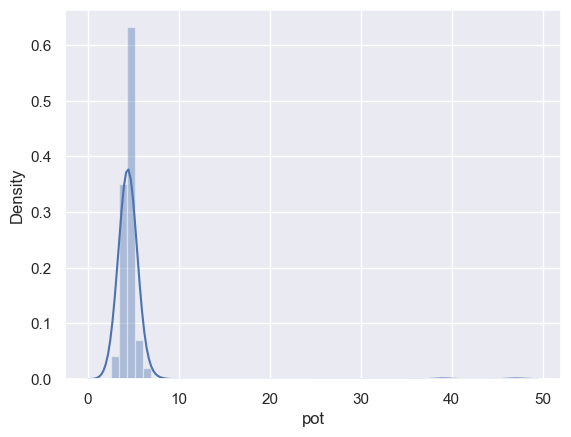

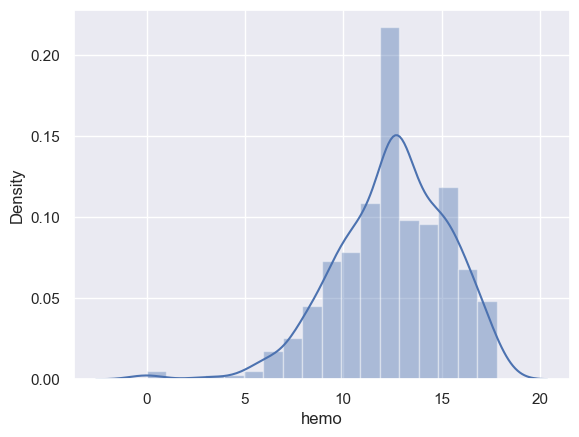

In [63]:
def distplots(col):
    sns.distplot(kidn_dis[col])
    plt.show()
    
for i in list(kidn_dis.select_dtypes(exclude=['object']).columns)[0:]:
    distplots(i)

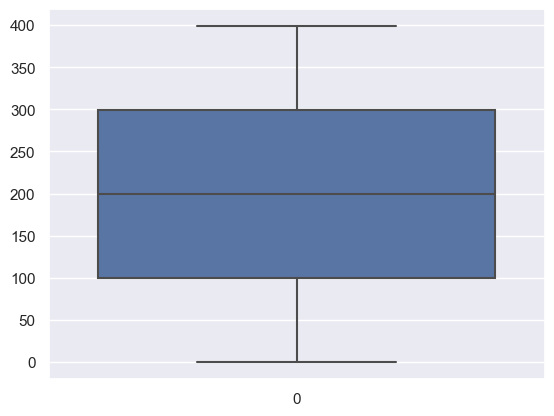

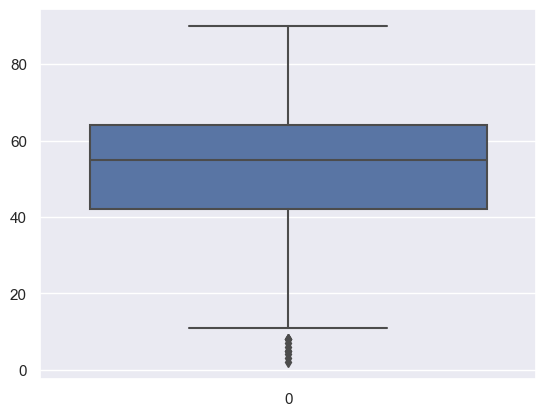

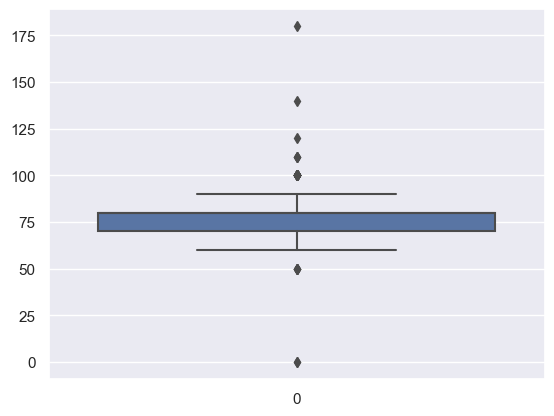

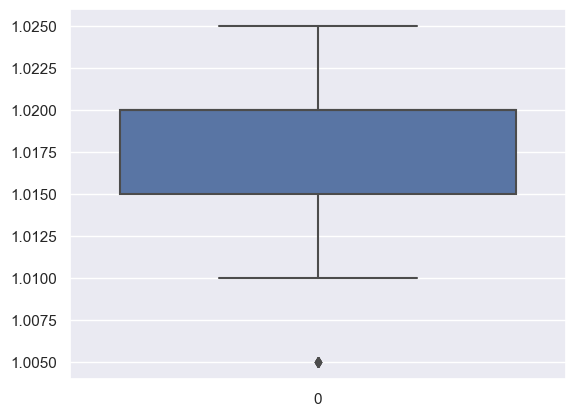

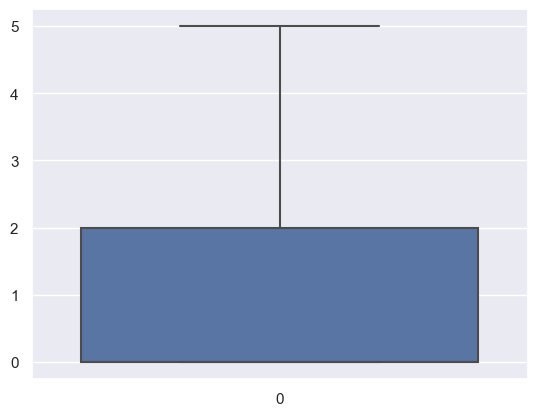

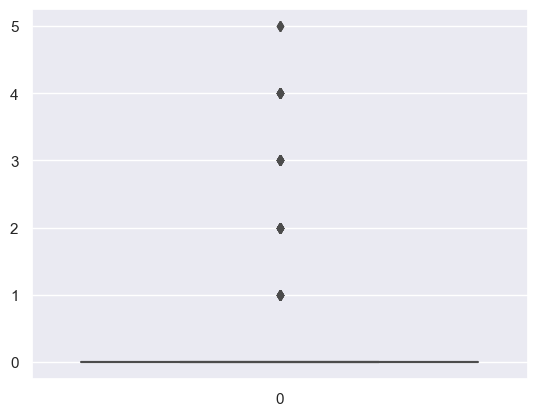

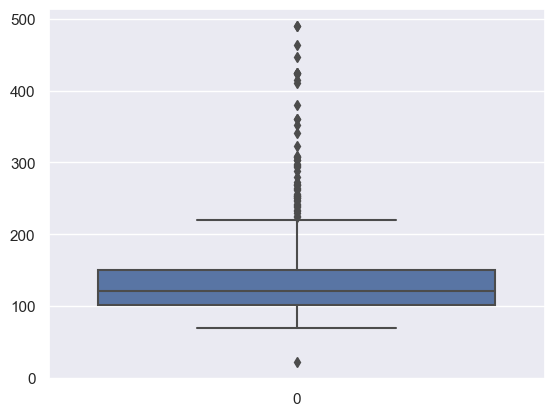

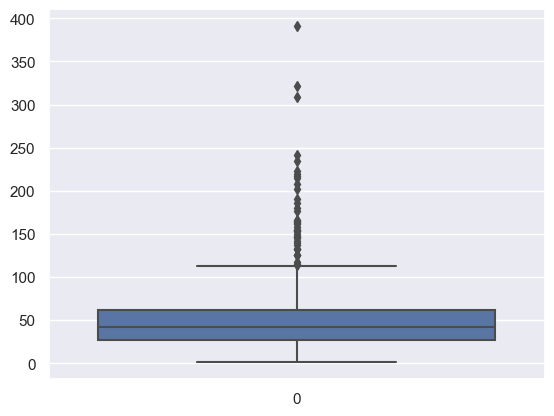

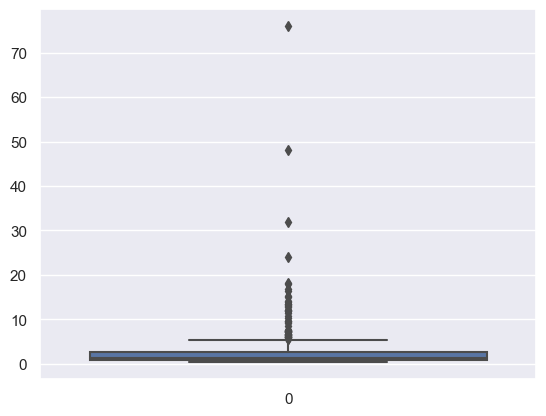

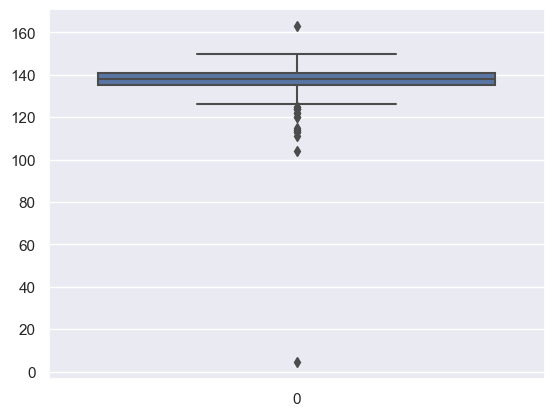

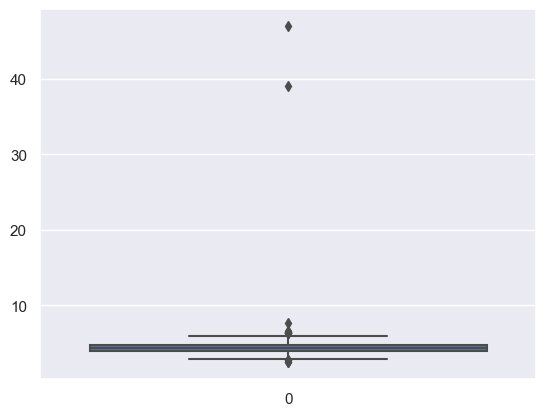

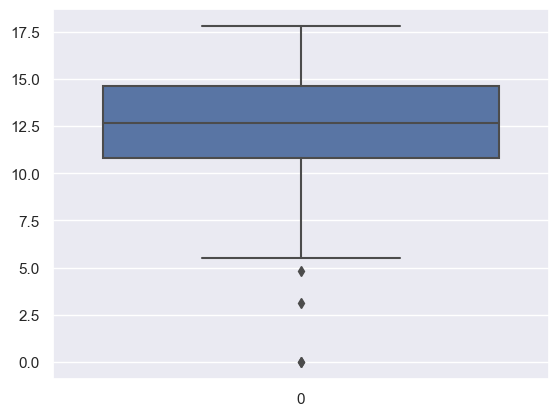

In [64]:
def boxplots(col):
    sns.boxplot(data=kidn_dis[col])
    plt.show()
    
for i in list(kidn_dis.select_dtypes(exclude=['object']).columns)[0:]:
    boxplots(i)

# Capping process carried here

In [65]:
cap_=kidn_dis.copy()

In [66]:
def irq_capping(kidn_dis,cols,factor):
     for col in cols:
        q1=kidn_dis[col].quantile(0.25)
        q3=kidn_dis[col].quantile(0.75)
        
        iqr= q3 - q1
        upper_whisker= q3+(factor*iqr)
        lower_whisker= q1-(factor*iqr)
        
        kidn_dis[col]=np.where(kidn_dis[col]>upper_whisker,upper_whisker,
                               np.where(kidn_dis[col]<lower_whisker,lower_whisker,kidn_dis[col]))

In [67]:
irq_capping(cap_,features,1.5)

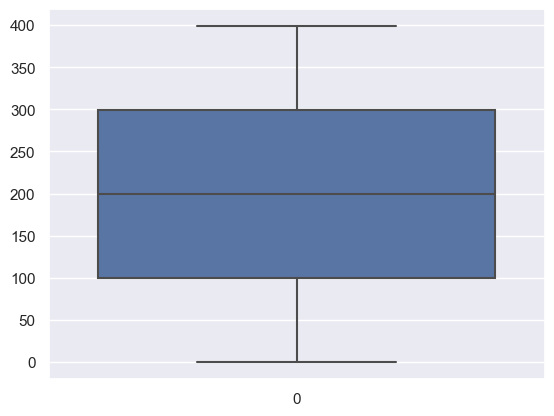

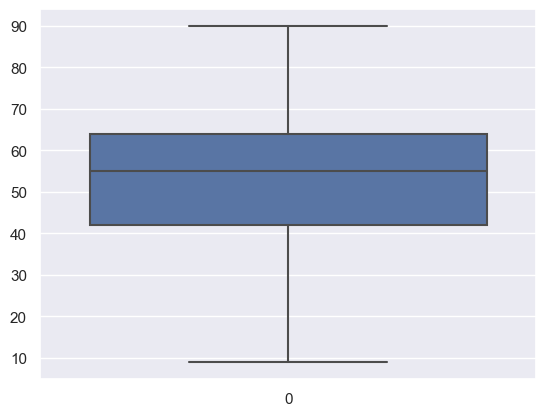

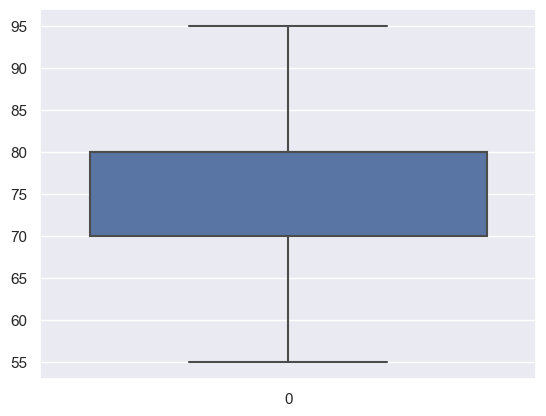

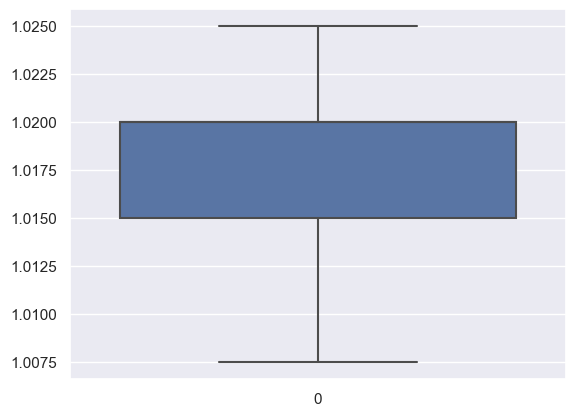

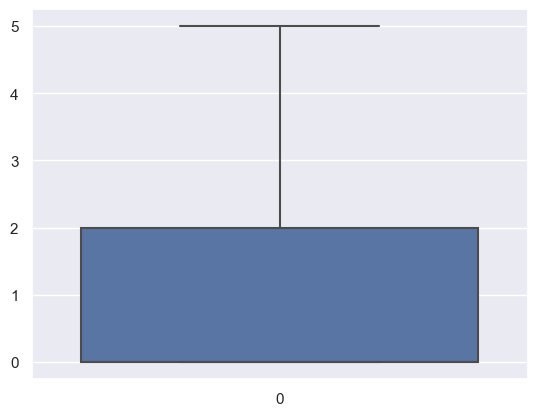

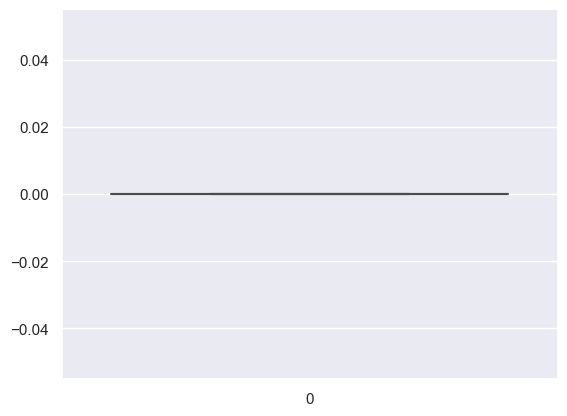

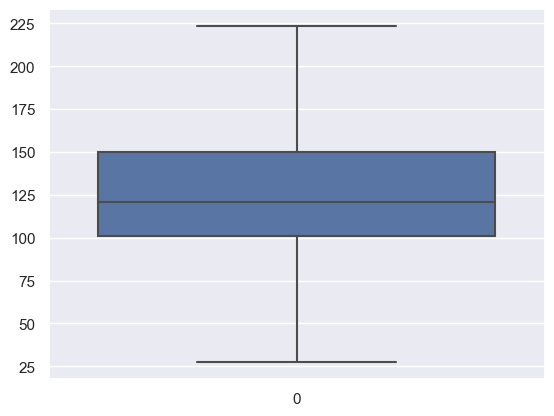

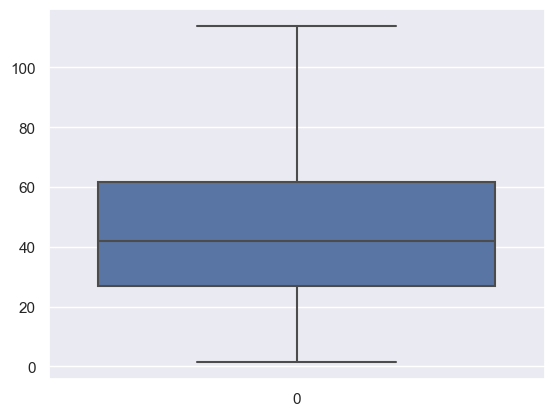

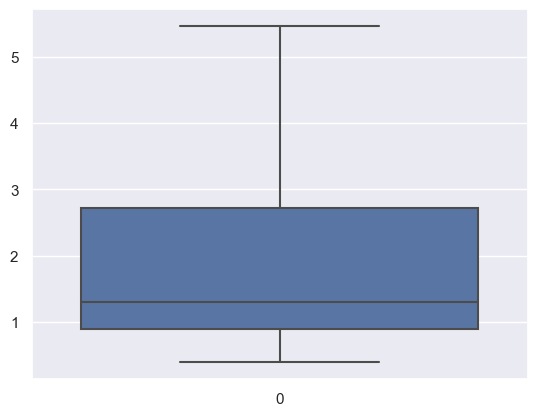

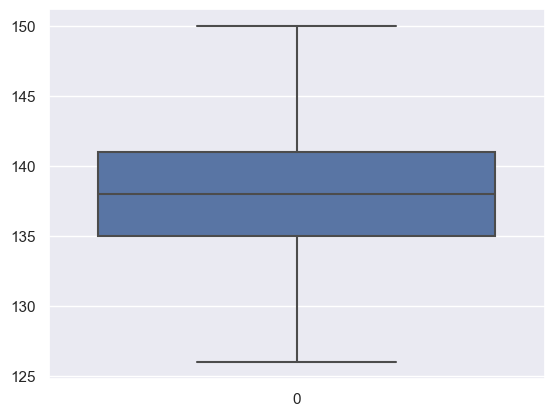

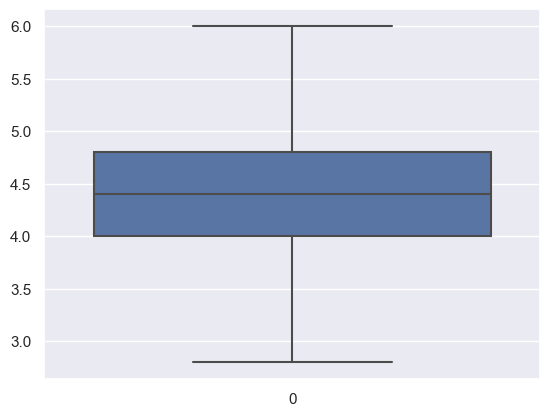

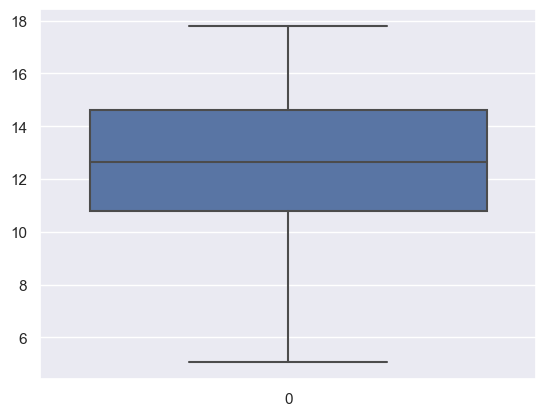

In [68]:
def boxplots(col):
    sns.boxplot(cap_[col])
    plt.show()
    
for i in list(cap_.select_dtypes(exclude=['object']).columns)[0:]:
    boxplots(i)

# EDA

In [69]:
!pip install klib

In [23]:
import klib

Klib.describe function for visualizing dataset

GridSpec(6, 14)

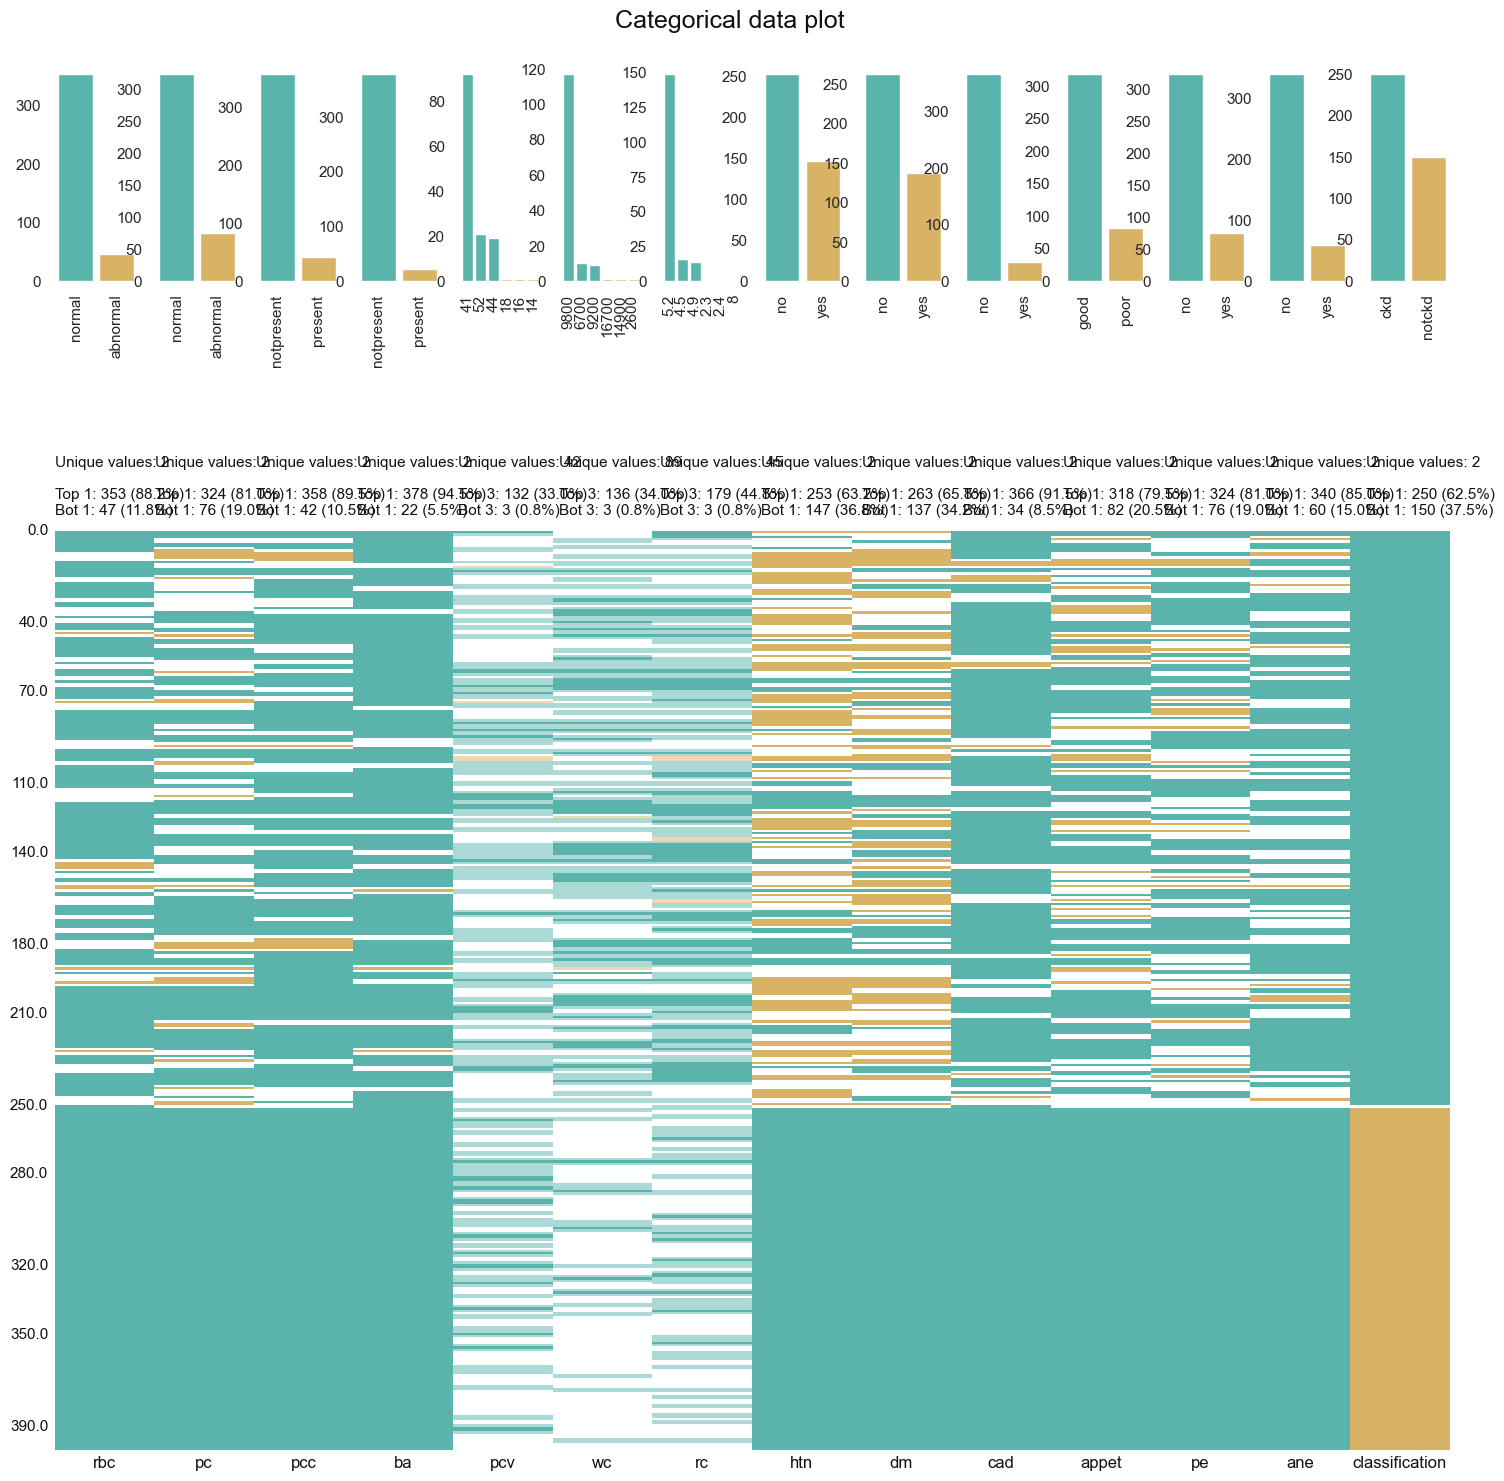

In [24]:
klib.cat_plot(kidn_dis)

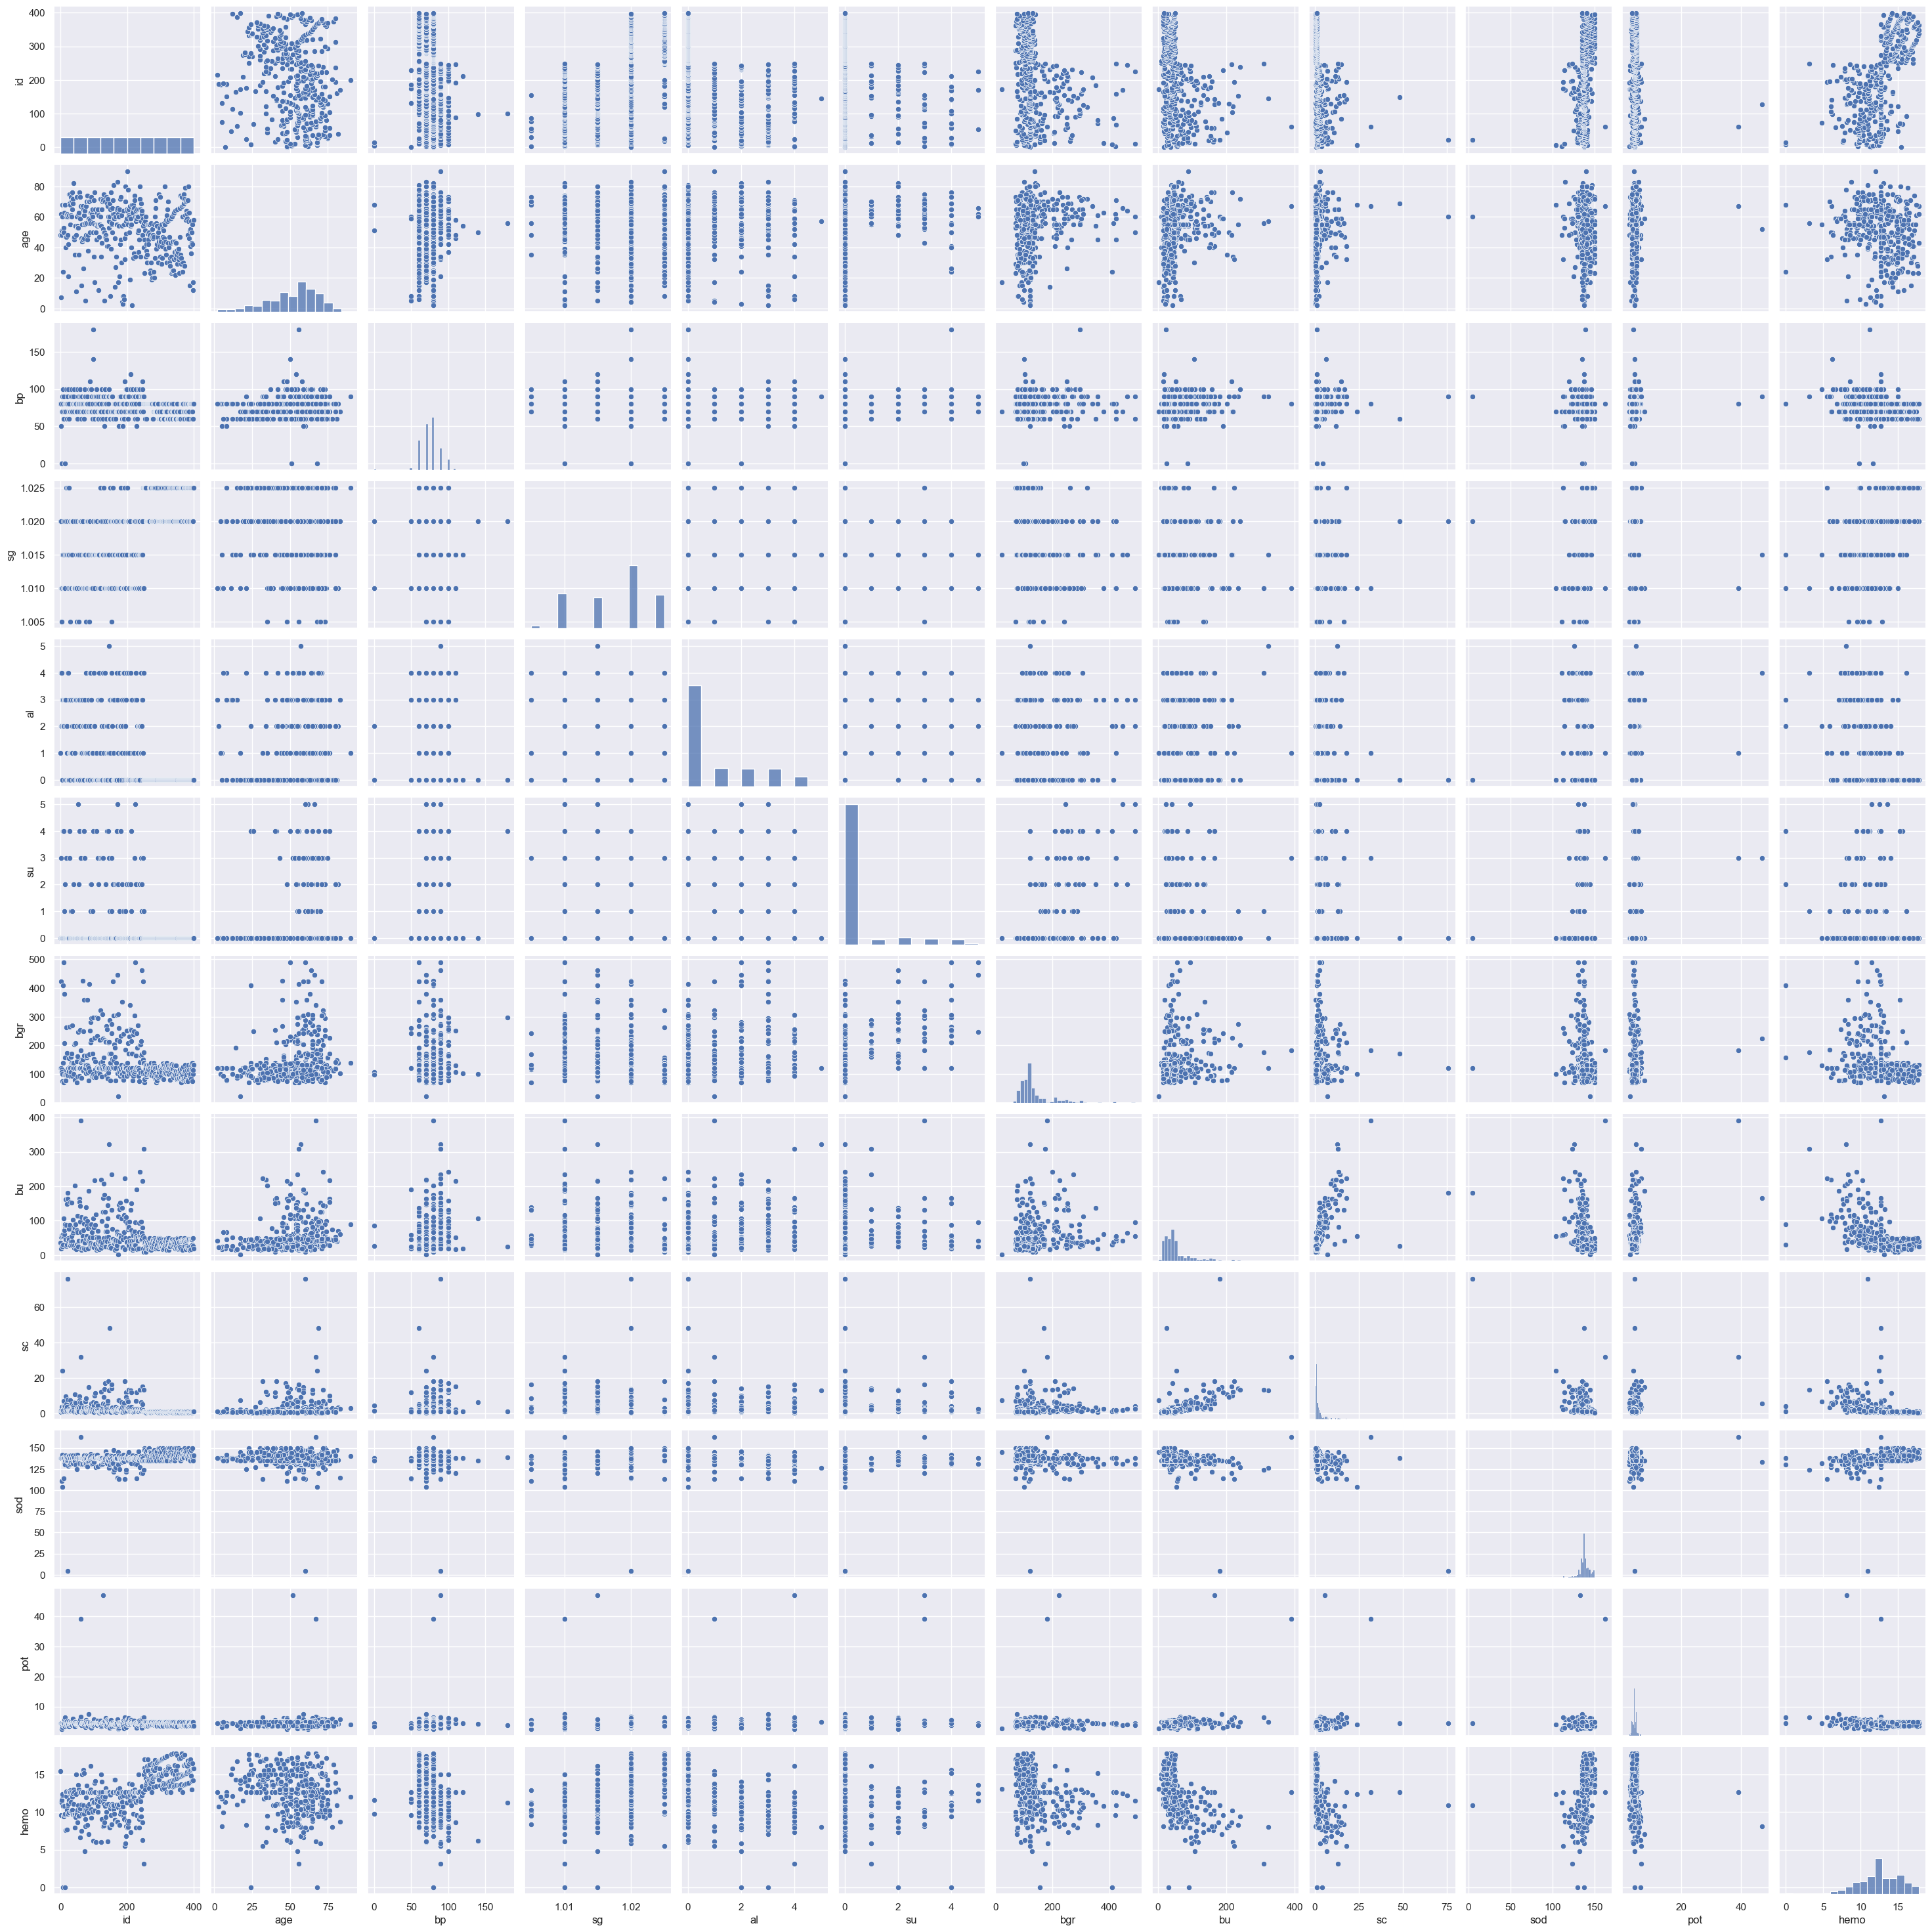

In [25]:
sns.pairplot(kidn_dis)

chooses positive and negative correlation

In [26]:
klib.corr_mat(kidn_dis)

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
id,1.00,-0.19,-0.19,0.58,-0.47,-0.25,-0.30,-0.30,-0.26,0.32,-0.07,0.61
age,-0.19,1.00,0.12,-0.16,0.09,0.19,0.23,0.19,0.13,-0.09,0.05,-0.16
bp,-0.19,0.12,1.00,-0.14,0.11,0.19,0.15,0.17,0.13,-0.09,0.07,-0.24
sg,0.58,-0.16,-0.14,1.00,-0.48,-0.29,-0.30,-0.24,-0.17,0.21,-0.05,0.48
al,-0.47,0.09,0.11,-0.48,1.00,0.29,0.29,0.35,0.16,-0.23,0.11,-0.47
su,-0.25,0.19,0.19,-0.29,0.29,1.00,0.63,0.13,0.10,-0.05,0.18,-0.20
bgr,-0.30,0.23,0.15,-0.30,0.29,0.63,1.00,0.12,0.07,-0.13,0.05,-0.28
bu,-0.30,0.19,0.17,-0.24,0.35,0.13,0.12,1.00,0.58,-0.31,0.34,-0.52
sc,-0.26,0.13,0.13,-0.17,0.16,0.10,0.07,0.58,1.00,-0.62,0.20,-0.33
sod,0.32,-0.09,-0.09,0.21,-0.23,-0.05,-0.13,-0.31,-0.62,1.00,0.07,0.32


Displaying positive correlations. Specify a positive "threshold" to limit the results further.
Displaying negative correlations. Specify a negative "threshold" to limit the results further.


<Axes: title={'center': 'Feature-correlation (pearson)'}>

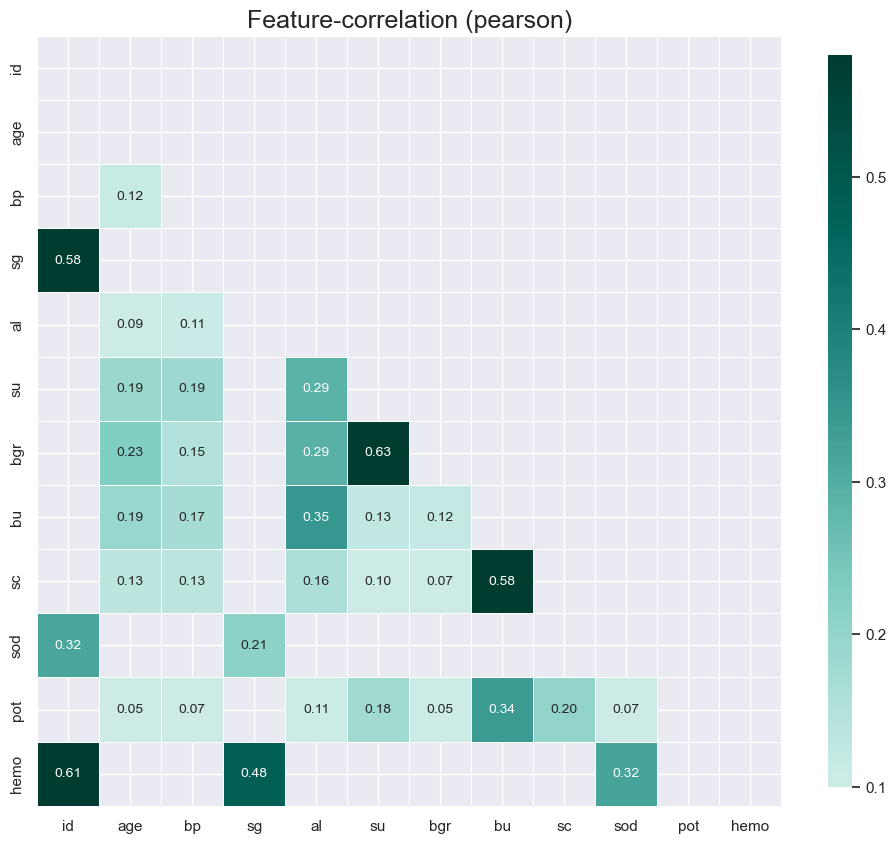

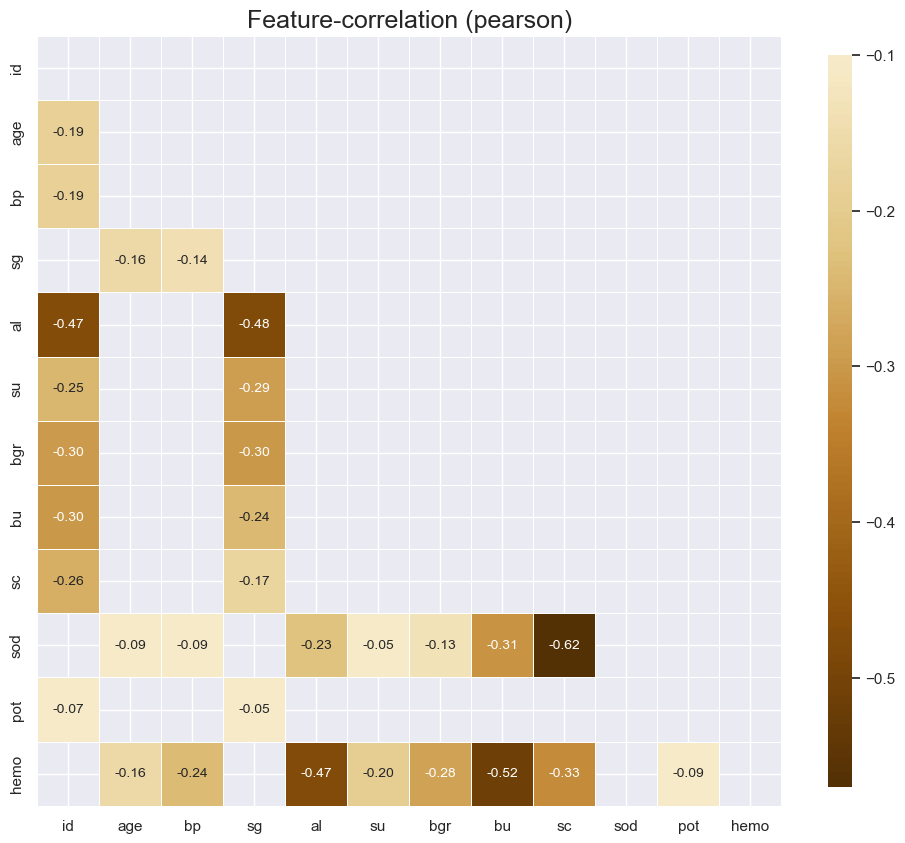

In [27]:
klib.corr_plot(kidn_dis, split="pos")
klib.corr_plot(kidn_dis,split="neg")

# Label encoding to convert categorical values to numerical

In [29]:

from sklearn import preprocessing

kidn_dis_enco = kidn_dis.apply(preprocessing.LabelEncoder().fit_transform)
kidn_dis_enco

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,40,4,3,1,0,1,1,0,0,...,30,69,30,1,1,0,0,0,0,0
1,1,5,1,3,4,0,1,1,0,0,...,24,53,30,0,0,0,0,0,0,0
2,2,54,4,1,2,3,1,1,0,0,...,17,67,30,0,1,0,1,0,1,0
3,3,40,3,0,4,0,1,0,1,0,...,18,59,17,1,0,0,1,1,1,0
4,4,43,0,1,2,0,1,1,0,0,...,21,65,24,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,47,4,3,0,0,1,1,0,0,...,33,59,27,0,0,0,0,0,0,1
396,396,34,3,4,0,0,1,1,0,0,...,40,69,40,0,0,0,0,0,0,1
397,397,8,4,3,0,0,1,1,0,0,...,35,58,32,0,0,0,0,0,0,1
398,398,11,2,4,0,0,1,1,0,0,...,37,64,37,0,0,0,0,0,0,1


# Finding the Correlation

<Axes: >

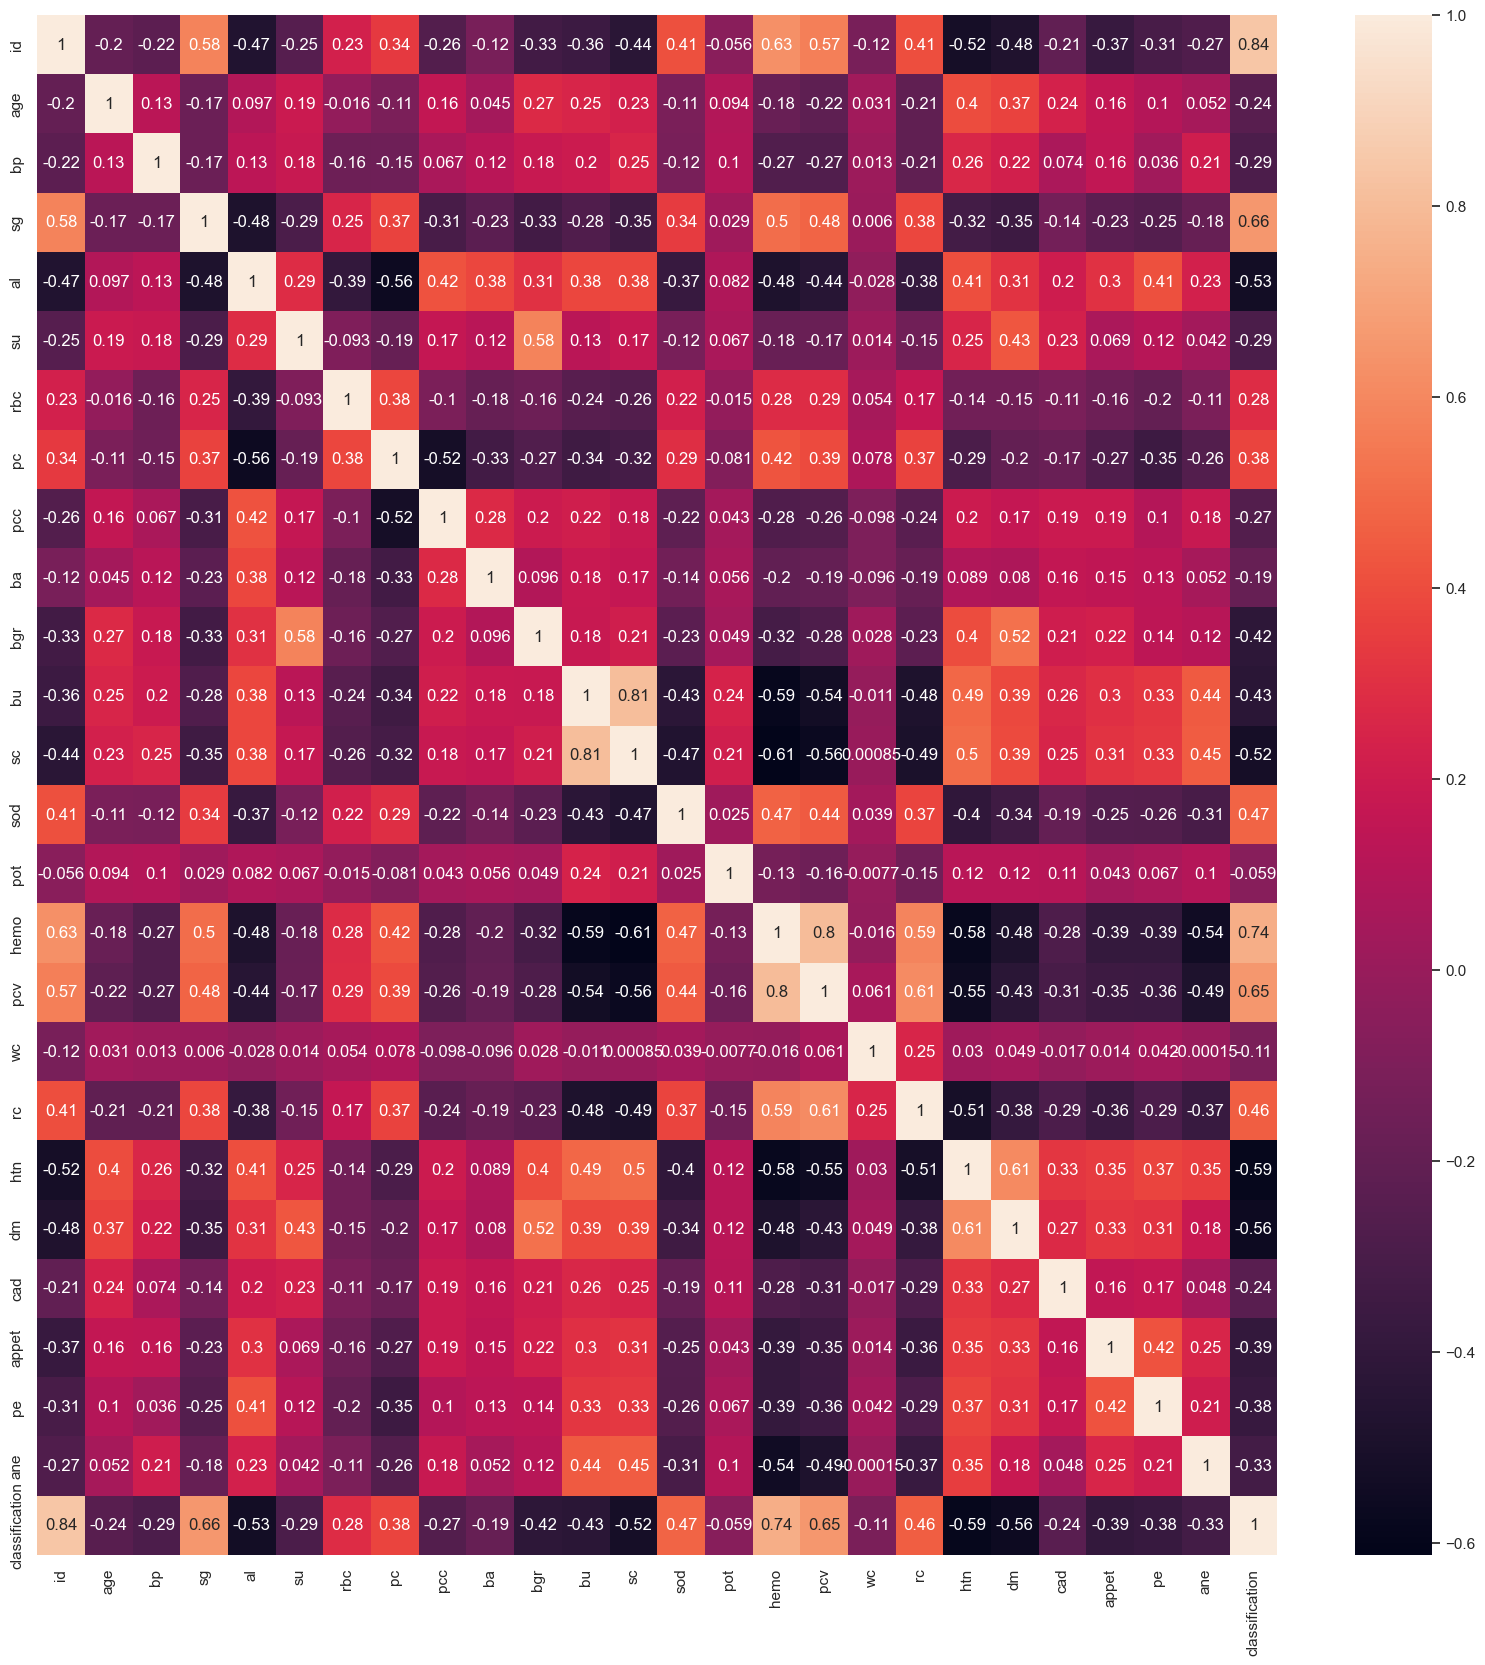

In [30]:
plt.figure(figsize=(20,20))
corr =kidn_dis_enco .corr()
sns.heatmap(corr, annot=True, cmap=None)

# Spliting data into Idependent and dependent variables

In [31]:
x = kidn_dis_enco.drop(['id','classification'], axis=1)
y = kidn_dis_enco[['classification']]

In [32]:
x.head(n=10)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,40,4,3,1,0,1,1,0,0,48,...,91,30,69,30,1,1,0,0,0,0
1,5,1,3,4,0,1,1,0,0,48,...,49,24,53,30,0,0,0,0,0,0
2,54,4,1,2,3,1,1,0,0,140,...,32,17,67,30,0,1,0,1,0,1
3,40,3,0,4,0,1,0,1,0,44,...,48,18,59,17,1,0,0,1,1,1
4,43,0,1,2,0,1,1,0,0,33,...,52,21,65,24,0,0,0,0,0,0
5,52,5,2,3,0,1,1,0,0,2,...,58,25,69,22,1,1,0,0,1,0
6,60,3,1,0,0,1,1,0,0,27,...,60,22,87,30,0,0,0,0,0,0
7,17,4,2,2,4,1,0,0,0,138,...,0,30,61,28,0,1,0,0,1,0
8,44,6,2,3,0,1,0,1,0,62,...,44,19,85,18,1,1,0,0,0,1
9,45,5,3,2,0,0,0,1,0,1,...,31,15,15,15,1,1,0,1,0,1


In [33]:
y.shape

(400, 1)

# Checking dependent variable is Balanced one are not

In [34]:
y.value_counts()

classification
0                 250
1                 150
Name: count, dtype: int64

<Axes: xlabel='classification'>

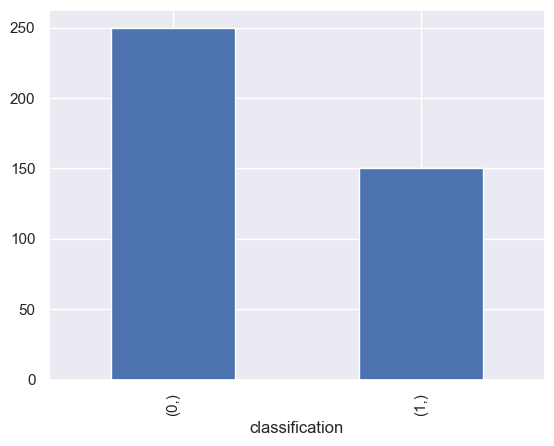

In [35]:
y.value_counts().plot(kind='bar')

# Balance the Dataset

In [36]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
print(Counter(y))

Counter({'classification': 1})


In [37]:
ros = RandomOverSampler()
x_ros, y_ros = ros.fit_resample(x, y)
print(Counter(y_ros))

Counter({'classification': 1})


In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler((-1,1))
x = scaler.fit_transform(x_ros)
y = y_ros

In [39]:
ros = RandomOverSampler()
x_ros, y_ros = ros.fit_resample(x, y)
print(Counter(y_ros))

Counter({'classification': 1})


In [40]:
print(y.value_counts())
print()
print(y_ros.value_counts())

classification
0                 250
1                 250
Name: count, dtype: int64

classification
0                 250
1                 250
Name: count, dtype: int64


<Axes: xlabel='classification'>

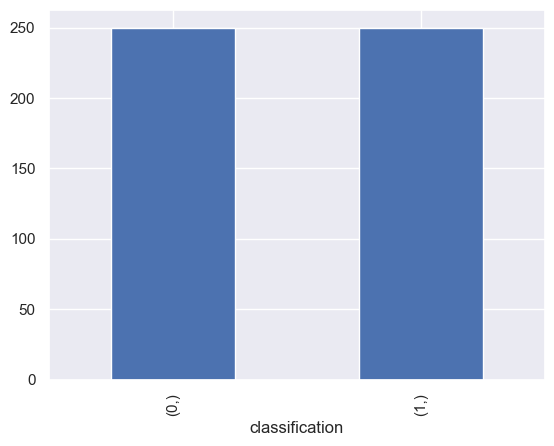

In [41]:
y.value_counts().plot(kind='bar')

In [42]:
y.shape

(500, 1)

# Feature Scaling

In [43]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc_x=sc.fit_transform(x)
sc_x=pd.DataFrame(sc_x)
sc_x.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,-0.208413,0.392578,0.244811,0.228193,-0.335309,0.322107,0.423374,-0.302825,-0.214535,-0.072809,...,0.879967,0.398935,0.300360,0.290191,1.549632,1.627770,-0.270114,-0.442913,-0.423374,-0.369274
1,-2.374226,-2.010962,0.244811,2.673124,-0.335309,0.322107,0.423374,-0.302825,-0.214535,-0.072809,...,-0.689135,-0.351883,-0.307194,0.290191,-0.645314,-0.614337,-0.270114,-0.442913,-0.423374,-0.369274
2,0.657912,0.392578,-1.623976,1.043170,2.848005,0.322107,0.423374,-0.302825,-0.214535,2.722870,...,-1.324247,-1.227837,0.224415,0.290191,-0.645314,1.627770,-0.270114,2.257778,-0.423374,2.708013
3,-0.208413,-0.408602,-2.558369,2.673124,-0.335309,0.322107,-2.361980,3.302236,-0.214535,-0.194361,...,-0.726494,-1.102701,-0.079362,-1.281675,1.549632,-0.614337,-0.270114,2.257778,2.361980,2.708013
4,-0.022772,-2.812143,-1.623976,1.043170,-0.335309,0.322107,0.423374,-0.302825,-0.214535,-0.528627,...,-0.577056,-0.727292,0.148471,-0.435286,-0.645314,-0.614337,-0.270114,-0.442913,-0.423374,-0.369274


In [44]:
from sklearn.decomposition import PCA

pca = PCA(0.95)
x_pca = pca.fit_transform(x)
print(x.shape)
print(x_pca.shape)


(500, 24)
(500, 18)


# Split the data into training and test

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=7)

In [46]:
!pip install xgboost

# Model Building

In [47]:
# LogisticRegression
logistic = LogisticRegression()
lr = logistic.fit(x_train, y_train)
y_pred_lr = logistic.predict(x_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# DecisionTree
dtree = DecisionTreeClassifier()
dt = dtree.fit(x_train, y_train)
y_pred_dt = dtree.predict(x_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# RandomForest
rfmodel = RandomForestClassifier()
rf = rfmodel.fit(x_train, y_train)
y_pred_rf = rfmodel.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# BaggingClassifier
bagg = BaggingClassifier()
bg = bagg.fit(x_train, y_train)
y_pred_bg = bagg.predict(x_test)
accuracy_bg = accuracy_score(y_test, y_pred_bg)

# AdaBoostClassifier
ada = AdaBoostClassifier()
ad = ada.fit(x_train, y_train)
y_pred_ad = ada.predict(x_test)
accuracy_ad = accuracy_score(y_test, y_pred_ad)

# GradientBoostingClassifier
gdb = GradientBoostingClassifier()
gd = gdb.fit(x_train, y_train)
y_pred_gd = gdb.predict(x_test)
accuracy_gd = accuracy_score(y_test, y_pred_gd)

# XGBClassifier = RF + GDBoosting - lambda - regularisation, gamma - autoprunning, eta - learning optimization rate
xgb = XGBClassifier()
xg = xgb.fit(x_train, y_train)
y_pred_xg = xgb.predict(x_test)
accuracy_xg = accuracy_score(y_test, y_pred_xg)


# SVM
svc = SVC()
sv = svc.fit(x_train, y_train)
y_pred_sv = svc.predict(x_test)
accuracy_sv = accuracy_score(y_test, y_pred_sv)             

# KNN
knn = KNeighborsClassifier()
kn = knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
                            
# GaussianNB
naive_gb = GaussianNB()
ngb = naive_gb.fit(x_train, y_train)
y_pred_ngb = naive_gb.predict(x_test)
accuracy_ngb = accuracy_score(y_test, y_pred_ngb) 

# BernoulliNB
naive_bn = BernoulliNB()
nbr = naive_bn.fit(x_train, y_train)
y_pred_nbr = naive_bn.predict(x_test)
accuracy_nbr = accuracy_score(y_test, y_pred_nbr) 

In [48]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

In [49]:
evc = VotingClassifier(estimators=[('lr',lr),('dt',dt),('rf', rf),('bg', bg),('ad',ad),
                                  ('gd', gd),('xg', xg),('sv', sv),('kn', kn),
                                  ('ngb', ngb),('nbr', nbr)], voting='hard')

model_evc = evc.fit(x_train, y_train)
pred_evc = evc.predict(x_test)
accuracy_evc = accuracy_score(y_test, pred_evc)

              Method Used  Accuracy
0      LogisticRegression     0.992
1            DecisionTree     0.992
2            RandomForest     1.000
3                 Bagging     0.992
4                Adaboost     1.000
5        GradientBoosting     1.000
6                 XGBoost     1.000
7           SupportVector     0.992
8       KNearestNeighbors     0.984
9      NaiveBayesGaussian     0.984
10  NaiveBayesBernoullies     0.952
11       VotingClassifier     1.000
Axes(0.125,0.11;0.775x0.77)


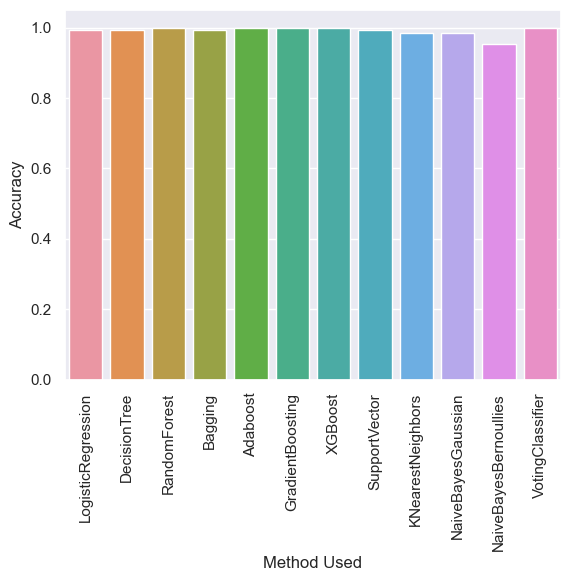

In [50]:
list1 = ['LogisticRegression','DecisionTree','RandomForest','Bagging','Adaboost',
         'GradientBoosting', 'XGBoost','SupportVector','KNearestNeighbors',
         'NaiveBayesGaussian','NaiveBayesBernoullies','VotingClassifier']

list2 = [accuracy_lr, accuracy_dt, accuracy_rf, accuracy_bg,accuracy_ad, accuracy_gd, 
         accuracy_xg, accuracy_sv, accuracy_knn, accuracy_ngb, accuracy_nbr, accuracy_evc]

list3 = [logistic, dtree, rfmodel, bagg, ada, gdb, xgb, svc, knn, naive_gb,naive_bn, evc ]

final_accuracy = pd.DataFrame({'Method Used': list1, "Accuracy": list2})
print(final_accuracy)

charts = sns.barplot(x="Method Used", y = 'Accuracy', data=final_accuracy)
charts.set_xticklabels(charts.get_xticklabels(), rotation=90)
print(charts)

# Crossvalidation with XGBoosting

In [52]:
from sklearn.model_selection import cross_val_score
train_acc=cross_val_score(xgb, x_train,y_train,cv=10)
test_acc=cross_val_score(xgb,x_test,y_test,cv=10)
print("Train Accuracy:",train_acc.mean())
print('----'*10)
print("Test Accuracy:",test_acc.mean())

Train Accuracy: 0.9892603129445234
----------------------------------------
Test Accuracy: 0.9679487179487178


# Crossvalidation with RandonForest

In [55]:
from sklearn.model_selection import cross_val_score
train_acc=cross_val_score(rf, x_train,y_train,cv=10)
test_acc=cross_val_score(rf,x_test,y_test,cv=10)
print("Train Accuracy:",train_acc.mean())
print('----'*10)
print("Test Accuracy:",test_acc.mean())

Train Accuracy: 0.9919630156472262
----------------------------------------
Test Accuracy: 0.9839743589743589
